In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


# Importing data


In [266]:
df_cab_data=pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')
df_city=pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')
df_customer_id=pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
df_transaction_id=pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')

In [179]:
df_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [180]:
# Checking for null values in cab data
df_cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [181]:
df_cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [182]:
df_cab_data['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [183]:
df_cab_data.shape

(359392, 7)

In [184]:
df_cab_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [268]:
df_cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [269]:
# Removing the space in column name 
for col in df_cab_data.columns:
    if ' ' in col:
        df_cab_data=df_cab_data.rename(columns={col:col.replace(' ','')})

In [270]:
df_cab_data.columns

Index(['TransactionID', 'DateofTravel', 'Company', 'City', 'KMTravelled',
       'PriceCharged', 'CostofTrip'],
      dtype='object')

In [271]:
a = df_cab_data['DateofTravel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
df_cab_data['DateofTravel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [196]:
df_cab_data.head()

,TransactionID,DateofTravel,Company,City,KMTravelled,PriceCharged,CostofTrip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [197]:
df_cab_data.head()

,TransactionID,DateofTravel,Company,City,KMTravelled,PriceCharged,CostofTrip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [200]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


# We have common column City in Both cab and city data but one city is missing in Cab data San Francisco 

In [201]:
df_city.isnull().sum() # no null values

City          0
Population    0
Users         0
dtype: int64

In [274]:
df_customer_id.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [275]:
df_customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [203]:
df_customer_id.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [265]:
for col in df_customer_id.columns:
    if ' ' in col:
       df_customer_id=df_customer_id.rename(columns={col:col.replace(' ','')})

In [276]:
df_transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [205]:

df_transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [206]:
df_transaction_id.isnull().sum() # no null values

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [207]:
for col in df_transaction_id.columns:
    if ' ' in col:
       df_transaction_id=df_transaction_id.rename(columns={col:col.replace(' ','')})

# merging table customer id and transaction id on customer id

In [208]:

data_cus_tra=pd.merge(df_customer_id,df_transaction_id,on='CustomerID')

In [209]:
data_cus_tra.head()

,CustomerID,Gender,Age,Income(USD/Month),TransactionID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


# merging  city and cab data on city

In [210]:

data_cab_city=pd.merge(df_cab_data,df_city,on='City')

In [211]:
data_cab_city.head()

,TransactionID,DateofTravel,Company,City,KMTravelled,PriceCharged,CostofTrip,Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


# merging data_cab_city and data_cus_tra on transaction id

In [213]:
data_final.head()

,TransactionID,DateofTravel,Company,City,KMTravelled,PriceCharged,CostofTrip,Population,Users,CustomerID,Gender,Age,Income(USD/Month),Payment_Mode
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Male,53,11242,Cash
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Male,23,23327,Cash
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Male,33,8536,Card


In [214]:
data_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   TransactionID      359392 non-null  int64         
 1   DateofTravel       359392 non-null  datetime64[ns]
 2   Company            359392 non-null  object        
 3   City               359392 non-null  object        
 4   KMTravelled        359392 non-null  float64       
 5   PriceCharged       359392 non-null  float64       
 6   CostofTrip         359392 non-null  float64       
 7   Population         359392 non-null  object        
 8   Users              359392 non-null  object        
 9   CustomerID         359392 non-null  int64         
 10  Gender             359392 non-null  object        
 11  Age                359392 non-null  int64         
 12  Income(USD/Month)  359392 non-null  int64         
 13  Payment_Mode       359392 non-null  object  

# Adding Profit column to final data set

In [215]:
Profit=data_final ['PriceCharged']-data_final['CostofTrip']

In [216]:
data_final['Profit']=Profit

In [217]:
data_final.head(2)

,TransactionID,DateofTravel,Company,City,KMTravelled,PriceCharged,CostofTrip,Population,Users,CustomerID,Gender,Age,Income(USD/Month),Payment_Mode,Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card,57.315
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card,23.666


# Converting Population and Users to data type Float

In [218]:

data_final['Population'] = [x.replace(',','') for x in data_final['Population']]
data_final['Population'] = data_final['Population'].astype(float)


data_final['Users'] = [x.replace(',','') for x in data_final['Users']]
data_final['Users'] = data_final['Users'].astype(float)



# To do some analysis dividing pink and yellow cab

In [283]:
Pink_cab=df_cab_data[df_cab_data['Company']=='Pink Cab']

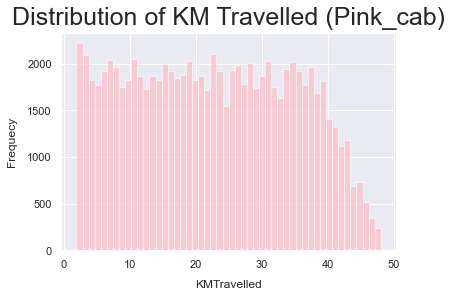

In [280]:
ax=sns.histplot(Pink_cab['KMTravelled'],kde=False,color='pink',bins=50)
plt.title('Distribution of KM Travelled (Pink_cab)',fontsize=25,y=1.01)
plt.xlabel("KMTravelled",labelpad=10)
plt.ylabel("Frequecy",labelpad=10)
plt.show()

In [ ]:
Yellow_cab=df_cab_data[df_cab_data['Company']=='Yellow Cab']

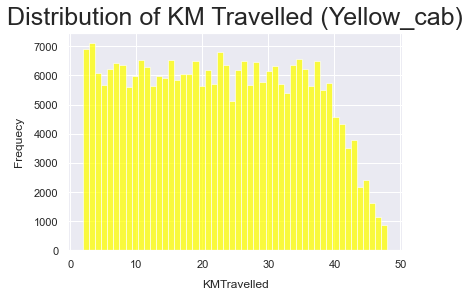

In [281]:
ax=sns.histplot(Yellow_cab['KMTravelled'],kde=False,color='yellow',bins=50)
plt.title('Distribution of KM Travelled (Yellow_cab)',fontsize=25,y=1.01)
plt.xlabel("KMTravelled",labelpad=10)
plt.ylabel("Frequecy",labelpad=10)
plt.show()

# Distance covered by both the cabs is between 2km -48km

C:\Users\bheem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bheem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


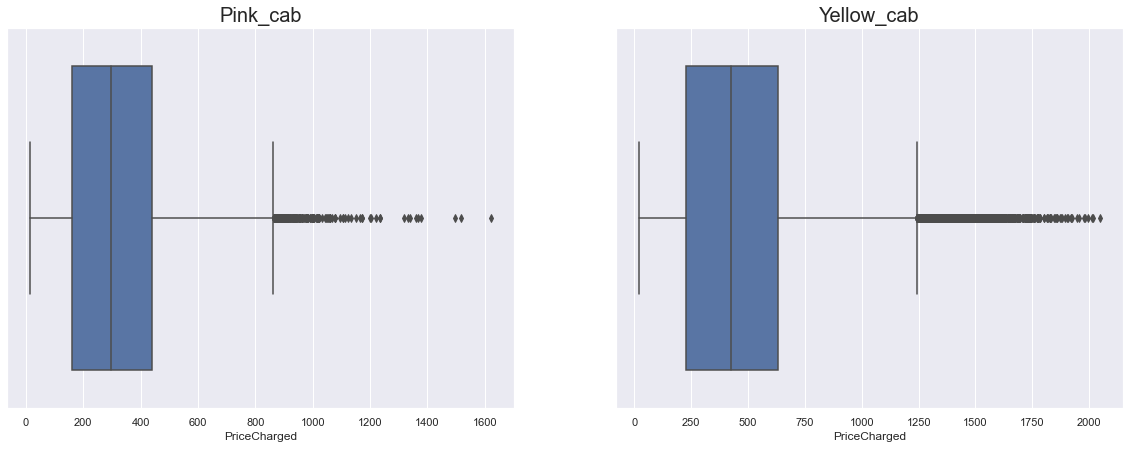

In [282]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sns.boxplot(Pink_cab['PriceCharged'], ax=ax1)
ax1.set_title('Pink_cab', fontsize=20)
sns.boxplot(Yellow_cab['PriceCharged'], ax=ax2)
ax2.set_title('Yellow_cab', fontsize=20)
plt.show()

# Price charged for yellow cab is more

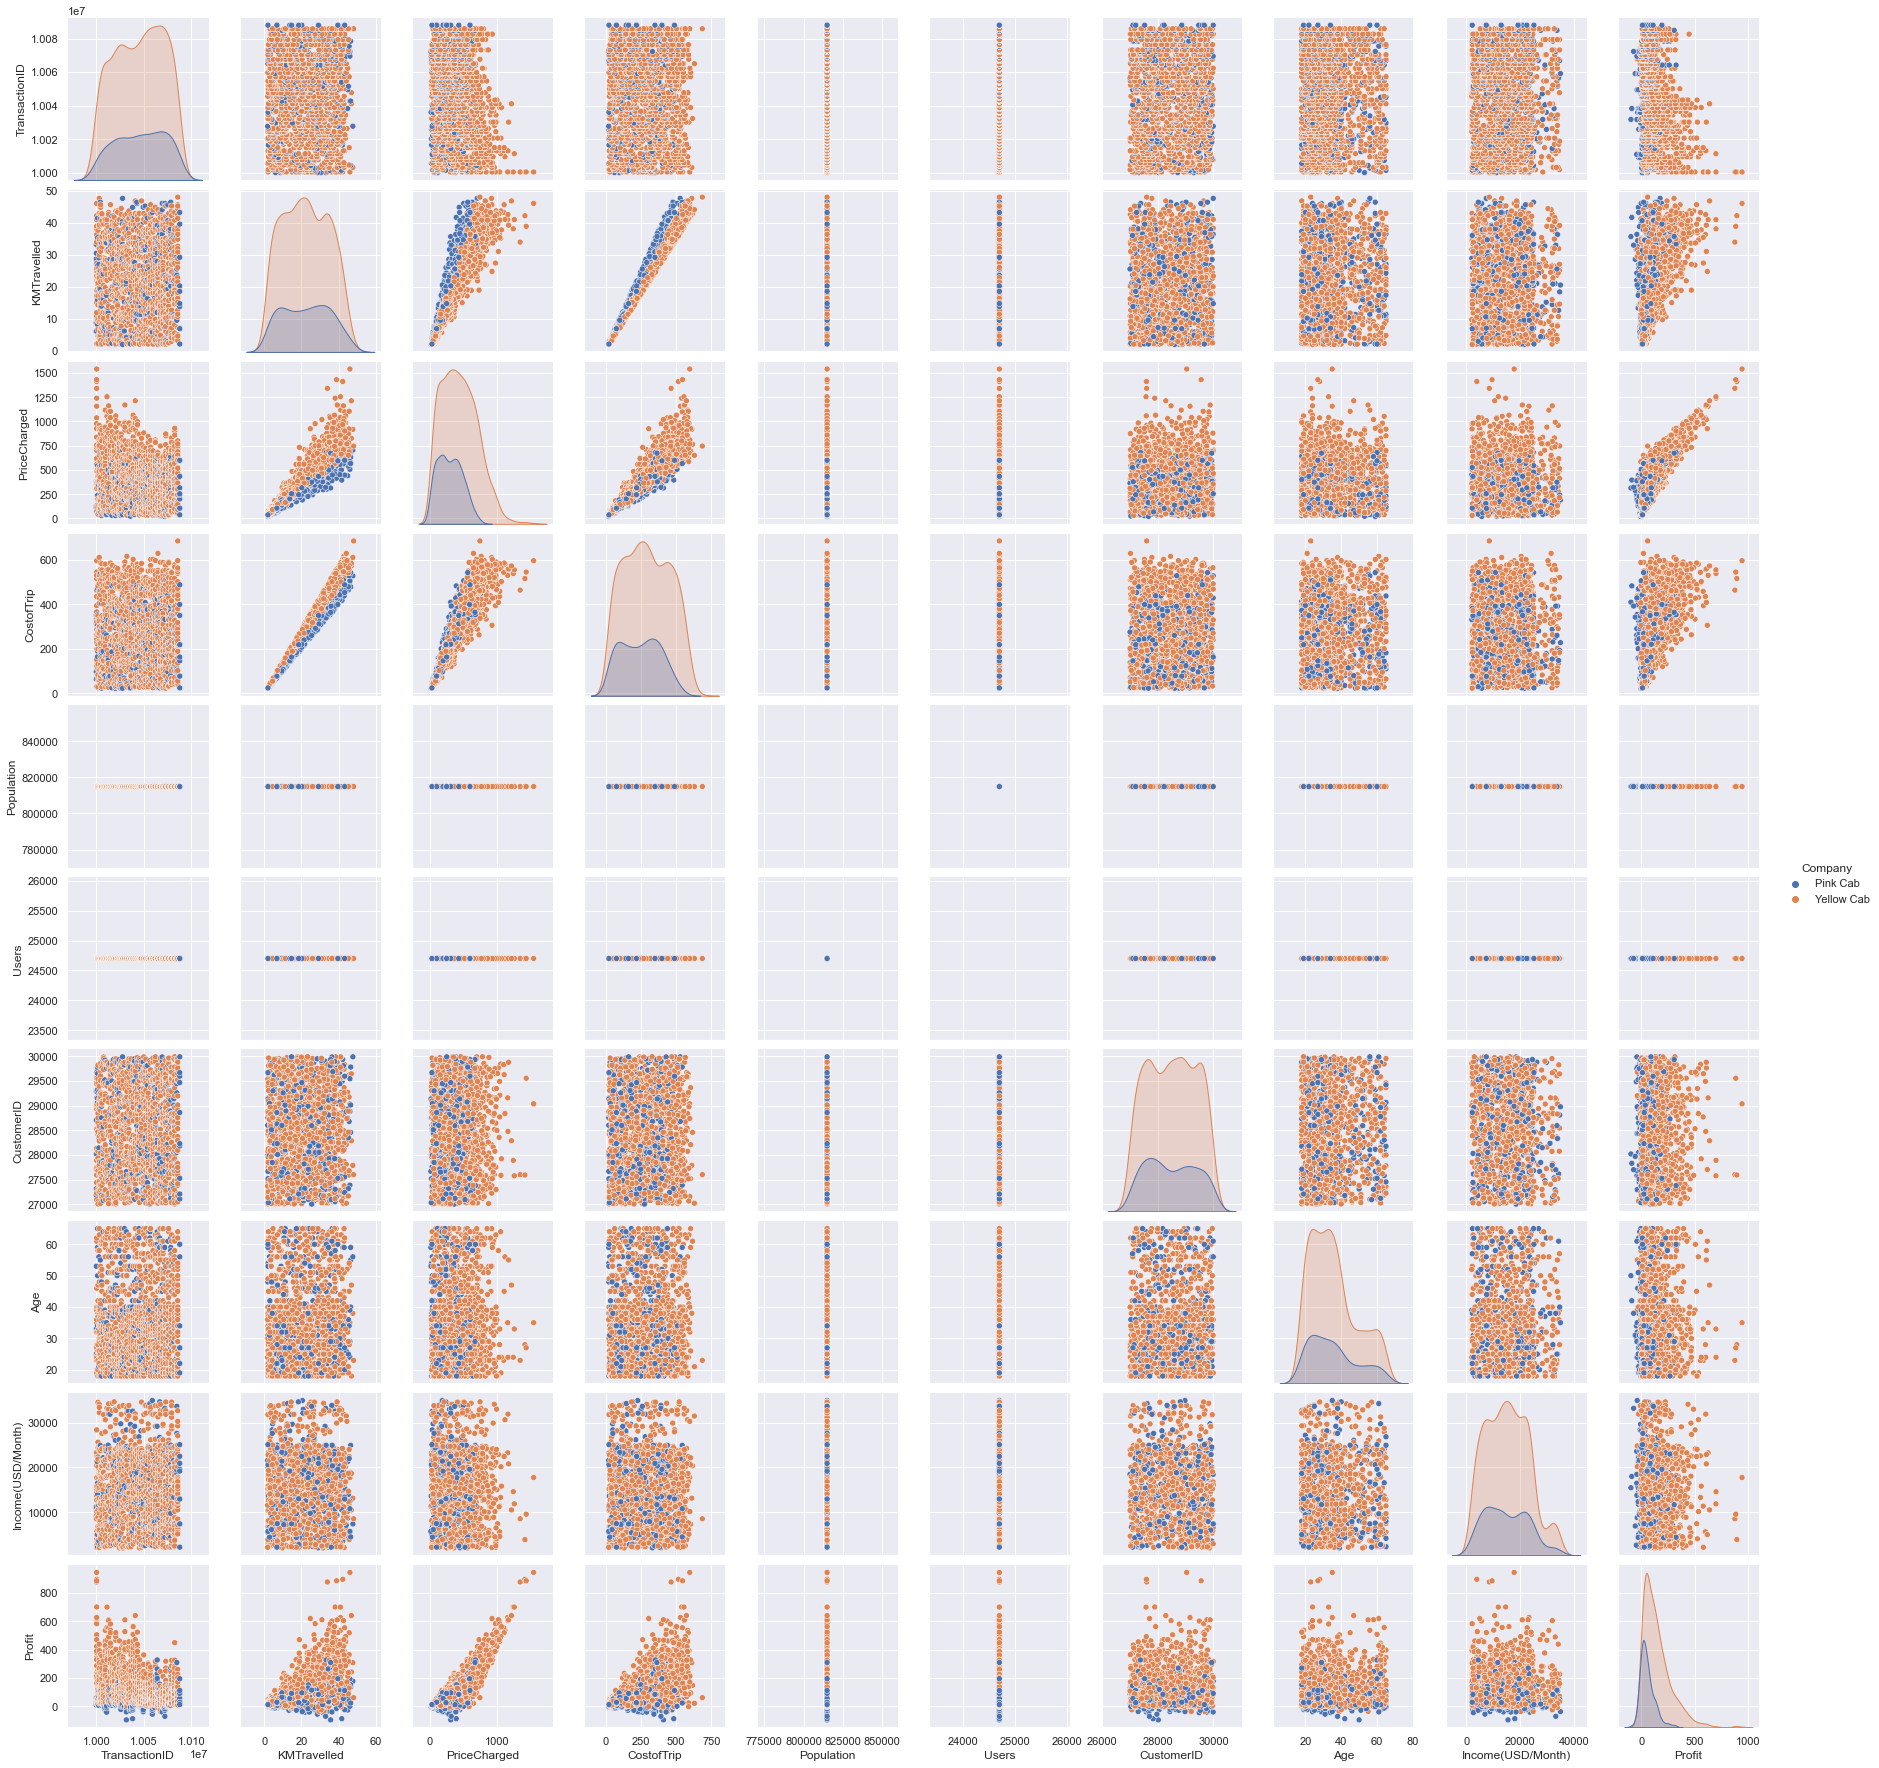

In [219]:
sns.pairplot(data_final.head(1500),hue='Company',kind='scatter')

In [220]:
data_final.corr()

,TransactionID,KMTravelled,PriceCharged,CostofTrip,Population,Users,CustomerID,Age,Income(USD/Month),Profit
TransactionID,1.000000,-0.001429,-0.052902,-0.003462,0.023868,0.013526,-0.016912,-0.001267,-0.001570,-0.087130
KMTravelled,-0.001429,1.000000,0.835753,0.981848,-0.002311,-0.000428,0.000389,-0.000369,-0.000544,0.462768
PriceCharged,-0.052902,0.835753,1.000000,0.859812,0.326589,0.281061,-0.177324,-0.003084,0.003228,0.864154
CostofTrip,-0.003462,0.981848,0.859812,1.000000,0.015108,0.023628,0.003077,-0.000189,-0.000633,0.486056
Population,0.023868,-0.002311,0.326589,0.015108,1.000000,0.915490,-0.647052,-0.009002,0.011868,0.544079
Users,0.013526,-0.000428,0.281061,0.023628,0.915490,1.000000,-0.610742,-0.005906,0.010464,0.457758
CustomerID,-0.016912,0.000389,-0.177324,0.003077,-0.647052,-0.610742,1.000000,-0.004735,-0.013608,-0.306527
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.009002,-0.005906,-0.004735,1.000000,0.003907,-0.005093
Income(USD/Month),-0.001570,-0.000544,0.003228,-0.000633,0.011868,0.010464,-0.013608,0.003907,1.000000,0.006148
Profit,-0.087130,0.462768,0.864154,0.486056,0.544079,0.457758,-0.306527,-0.005093,0.006148,1.000000


Text(0.5, 1.0, 'Correlation heatmap of  "G2M investment" ')

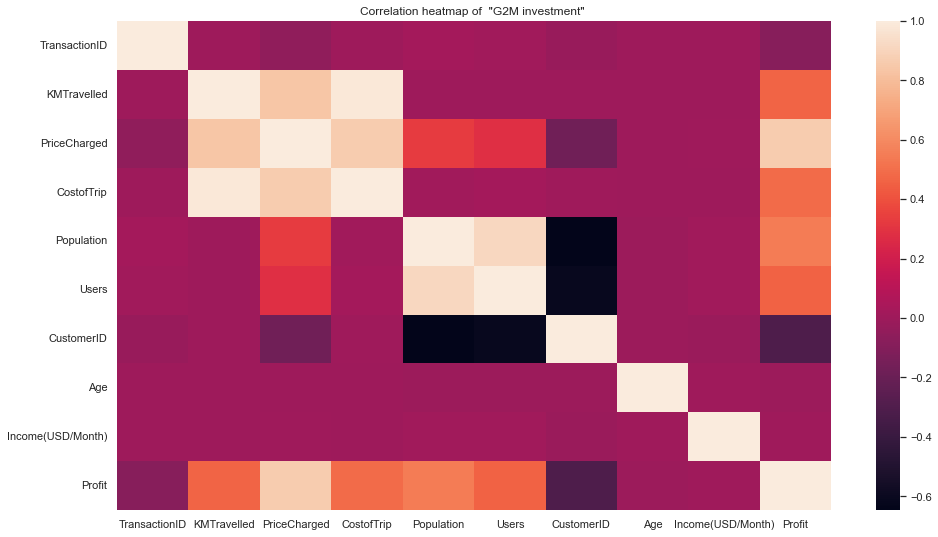

In [221]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(data_final.corr())
plt.title('Correlation heatmap of  "G2M investment" ')

# There is a strong correlation Population v/s Users,Price Charged v/s KmTravelled,Cost of Trip v/s KMtravelled
# there is a correlation between Price Charged v/s Profit

In [223]:
user=data_final.groupby('Company')
avg_user = user.Users.mean()
avg_user

Company
Pink Cab      125590.813330
Yellow Cab    168473.246981
Name: Users, dtype: float64

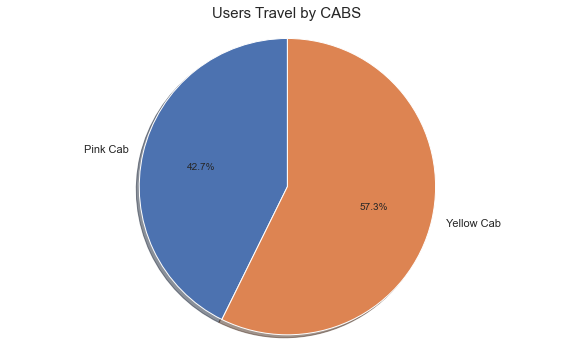

In [224]:
avg_user
figp, axp = plt.subplots(figsize=(10,6))
axp.pie(avg_user , labels=index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Users Travel by CABS', fontsize = 15)
plt.show()

# It shows more users are there for Yellow Cab

In [226]:
city_users=data_final.groupby('City').Users.count()

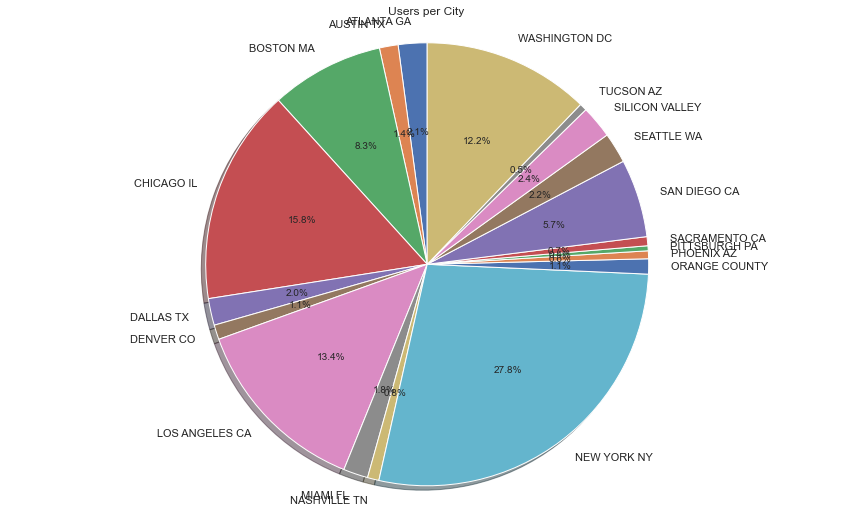

In [227]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(15,9))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

# New York City has highest number of users then Chicago

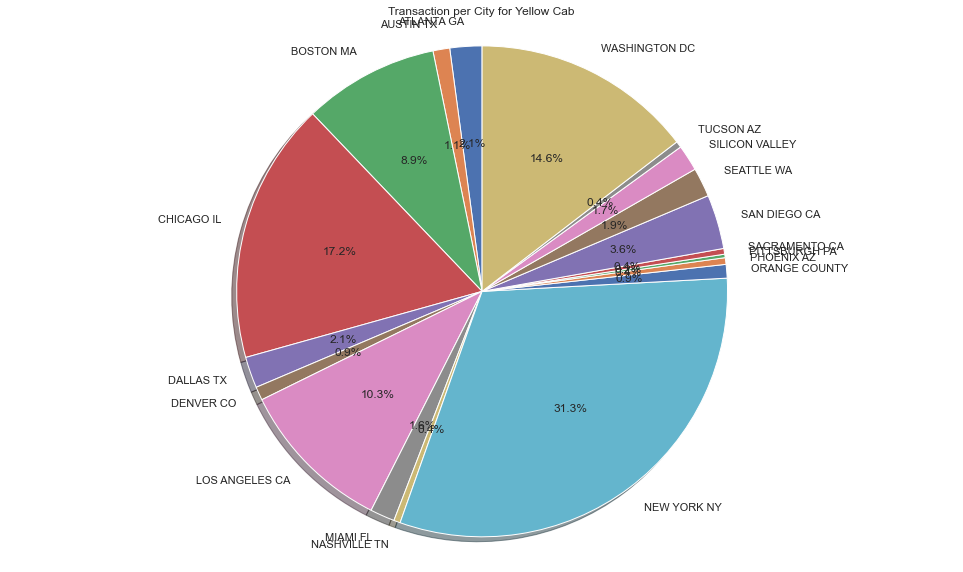

In [278]:
city_y= data_final[data_final.Company=='Yellow Cab'].groupby('City').TransactionID.count()
city_y
labs = city_y.index
vals = city_y.values
figp, axp = plt.subplots(figsize=(17,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Yellow Cab')
plt.show()

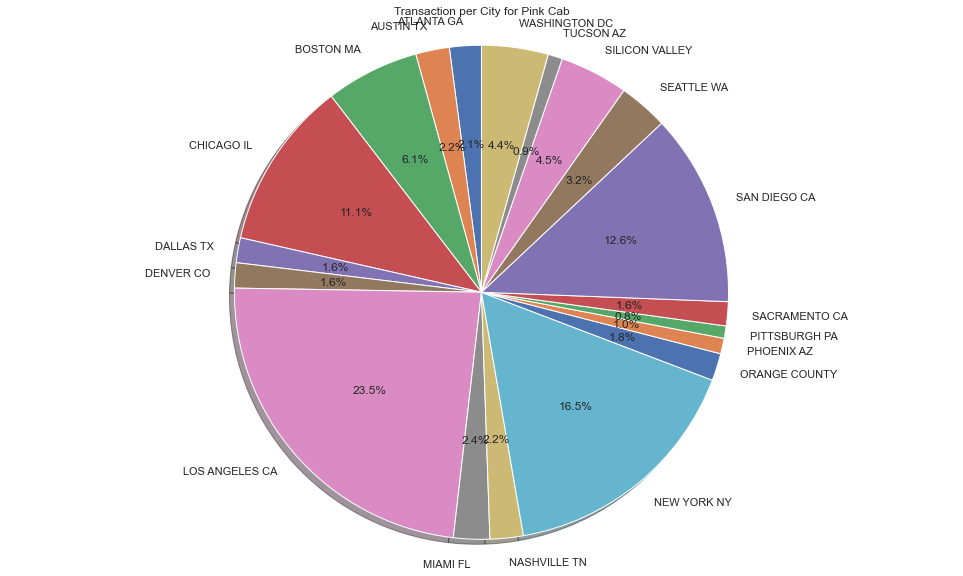

In [279]:
city_p= data_final[data_final.Company=='Pink Cab'].groupby('City').TransactionID.count()
city_p
labs = city_p.index
vals = city_p.values
figp, axp = plt.subplots(figsize=(17,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()

# Yellow cab has maximum users in New York City which has highest no of users 
# Pink Cab has Maximum users in Los Angeles

In [232]:
gender_y=data_final[data_final.Company=='Yellow Cab'].groupby('Gender').PriceCharged.mean()
gender_y


Gender
Female    454.571538
Male      460.821326
Name: PriceCharged, dtype: float64

In [233]:
gender_p=data_final[data_final.Company=='Pink Cab'].groupby('Gender').PriceCharged.mean()
gender_p

Gender
Female    310.624823
Male      310.940547
Name: PriceCharged, dtype: float64

In [234]:
gender_cab=data_final.groupby(['Company','Gender']).CustomerID.nunique()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: CustomerID, dtype: int64

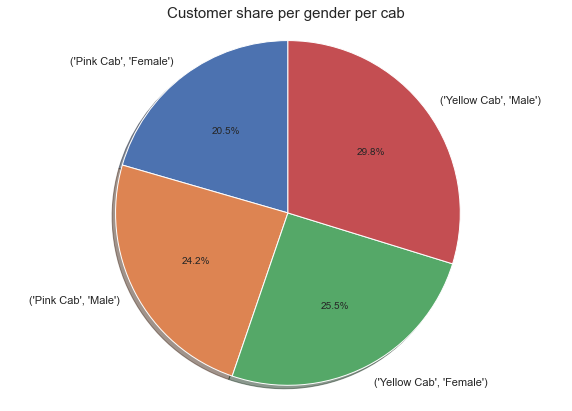

In [235]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab', fontsize = 15)
plt.show()

# More male Users than female
# Yello cab is preferred more

C:\Users\bheem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


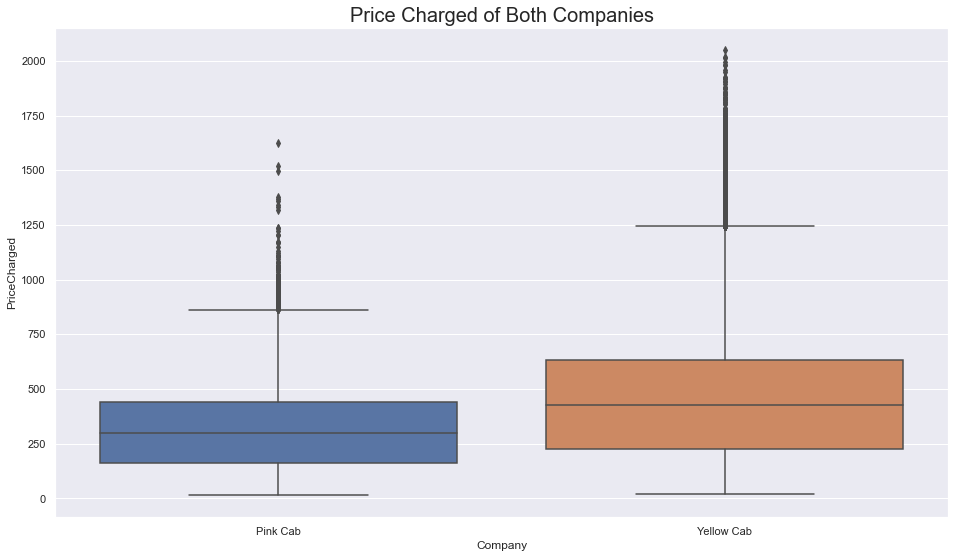

In [236]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (16, 9))

sns.boxplot(data_final['Company'], data_final['PriceCharged'])
plt.title('Price Charged of Both Companies', fontsize=20)
plt.show()

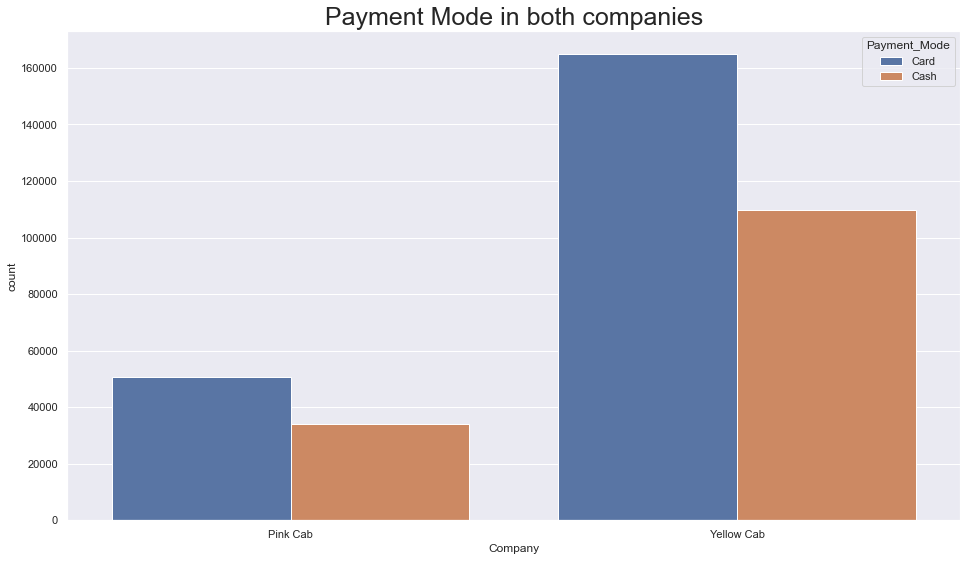

In [237]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=data_final)
plt.title('Payment Mode in both companies', fontsize=25)
plt.show()

# More Users Preferred card as Payment mode

In [239]:
data_final['Year'] = data_final['DateofTravel'].dt.year
data_final['Month'] = data_final['DateofTravel'].dt.month
data_final['Day'] = data_final['DateofTravel'].dt.day



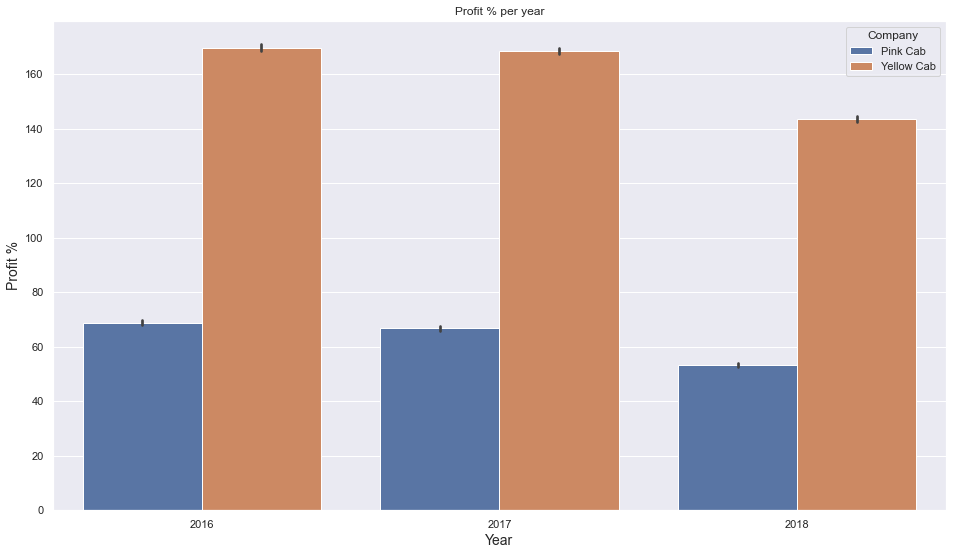

In [240]:
plt.figure(figsize = (16, 9))
sns.barplot(x='Year', y='Profit', hue="Company", data=data_final)
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

# There is a decrease in Profit in 2018 showing business is slow down

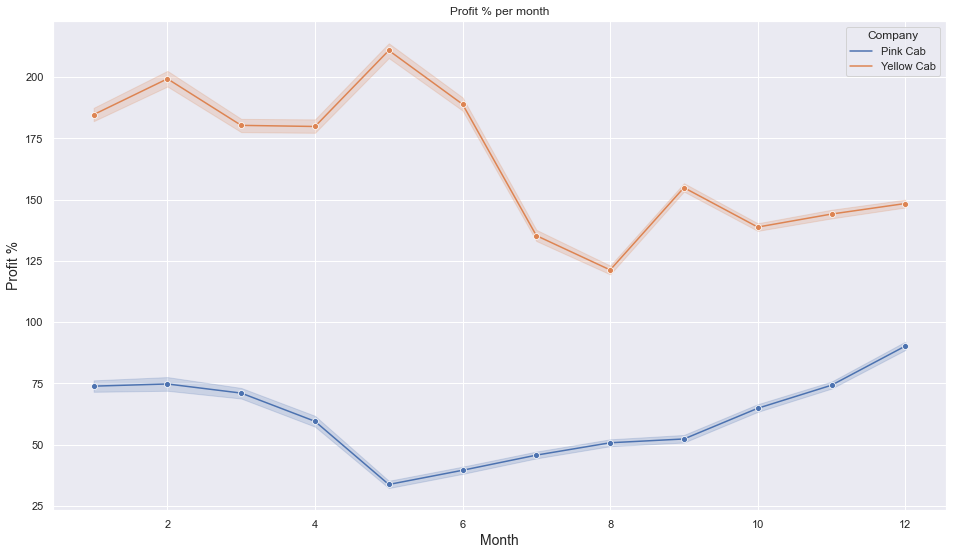

In [242]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Month', y='Profit', hue="Company", data=data_final, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month")
plt.show()

# Profit % w.r.t month

In [244]:
data_final.head()

,TransactionID,DateofTravel,Company,City,KMTravelled,PriceCharged,CostofTrip,Population,Users,CustomerID,Gender,Age,Income(USD/Month),Payment_Mode,Profit,Year,Month,Day
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885.0,24701.0,29290,Male,28,10813,Card,57.315,2016,1,7
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885.0,24701.0,27703,Male,27,9237,Card,23.666,2016,1,5
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885.0,24701.0,28712,Male,53,11242,Cash,27.568,2016,1,1
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885.0,24701.0,28020,Male,23,23327,Cash,25.798,2016,1,6
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885.0,24701.0,27182,Male,33,8536,Card,16.844,2016,1,2


In [245]:
data_final.groupby('Gender',as_index=False).Age.mean()

,Gender,Age
0,Female,35.287608
1,Male,35.373300


C:\Users\bheem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


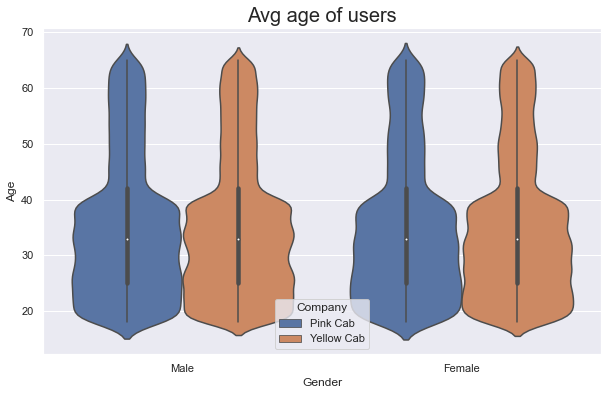

In [246]:
sns.set(style = 'darkgrid') 

plt.figure(figsize = (10, 6))

sns.violinplot(data_final['Gender'], data_final['Age'], hue = data_final['Company'])
plt.title('Avg age of users', fontsize=20)
plt.show()

# Average age of the users whether male or female is 35

C:\Users\bheem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


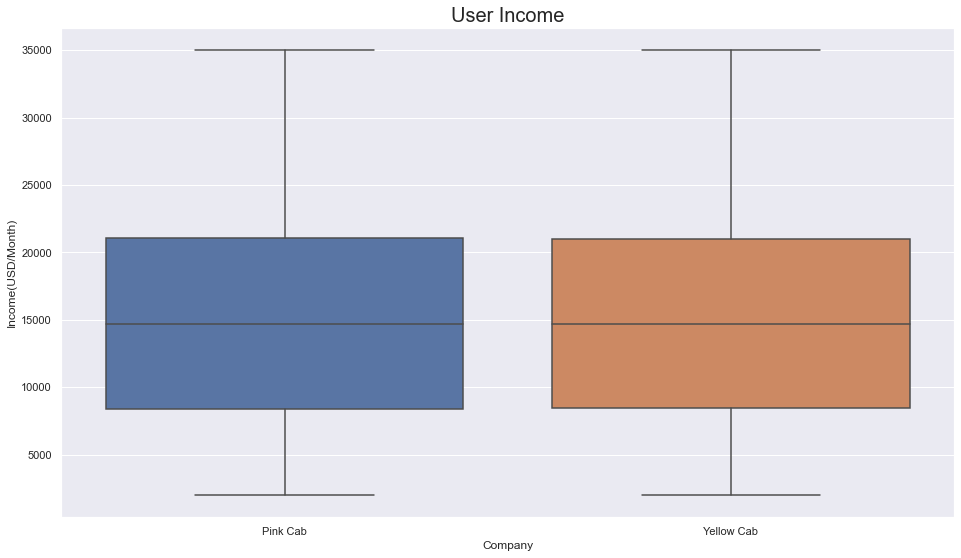

In [248]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (16, 9))

sns.boxplot(data_final['Company'], data_final['Income(USD/Month)'])
plt.title('User Income', fontsize=20)
plt.show()

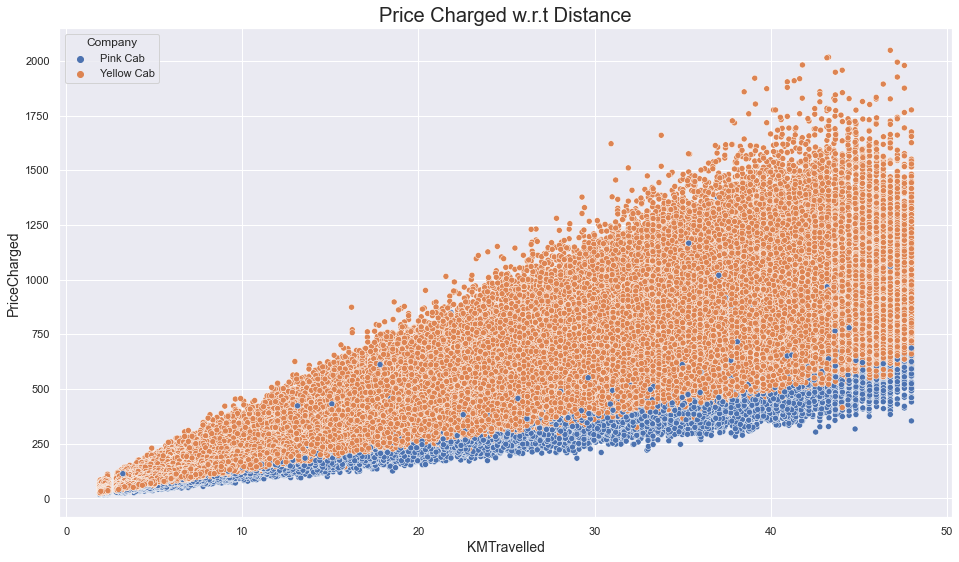

In [249]:
plt.figure(figsize = (16, 9))

sns.scatterplot(data=data_final, x="KMTravelled", y='PriceCharged', hue='Company')
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('PriceCharged',fontsize = 14)
plt.xlabel('KMTravelled',fontsize = 14)
plt.show()

# linear relation ship between KMtravelled and Price charged

# HYPOTHESIS TESTING --1


Null Hypothesis H0----- There is no difference for cash or card payment
Alternate Hypothesis H1-----There is a difference for cash payment and card payment

In [251]:
#Pink Cab
a = data_final[(data_final.Payment_Mode=='Cash')&(data_final.Company=='Pink Cab')].groupby('TransactionID').Profit.mean()
b = data_final[(data_final.Payment_Mode=='Card')&(data_final.Company=='Pink Cab')].groupby('TransactionID').Profit.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a  statistical difference ')
else:
    print('We accept null hypothesis that there is  no  statistical difference ')
    
print('P value is ', p_value)

We accept null hypothesis that there is  no  statistical difference 
P value is  0.7900465828793288


In [252]:
a = data_final[(data_final.Payment_Mode=='Cash')&(data_final.Company=='Yellow Cab')].groupby('TransactionID').Profit.mean()
b = data_final[(data_final.Payment_Mode=='Card')&(data_final.Company=='Yellow Cab')].groupby('TransactionID').Profit.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.2933060638298729


# HYPOTHESIS TESTING --2 
Null Hypothesis H0 ------December is a good month for business than November 
Alternate Hypothesis h1------- December is not a good month for business than november


In [253]:
data_final['Month'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [254]:
a = data_final[(data_final.Month==12)&(data_final.Company=='Pink Cab')].groupby('Year').Profit.mean()
b = data_final[(data_final.Month==11)&(data_final.Company=='Pink Cab')].groupby('Year').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

3 3
We accept null hypothesis that theres no difference
P value is  0.23903944514341485


In [255]:
a

Year
2016    98.952301
2017    96.112924
2018    74.706174
Name: Profit, dtype: float64

In [256]:
b

Year
2016    88.684870
2017    73.789065
2018    63.081366
Name: Profit, dtype: float64

In [257]:
a = data_final[(data_final.Month==12)&(data_final.Company=='Yellow Cab')].groupby('Year').Profit.mean()
b = data_final[(data_final.Month==11)&(data_final.Company=='Yellow Cab')].groupby('Year').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

3 3
We accept null hypothesis that theres no difference
P value is  0.7846822889997085


In [258]:
a

Year
2016    158.382935
2017    152.373389
2018    133.951772
Name: Profit, dtype: float64

In [259]:
b

Year
2016    154.664530
2017    153.403396
2018    126.278370
Name: Profit, dtype: float64

# HYPOTHESIS TESTING --3
Null Hypothesis H0----Profit remain the same regarding Gender for both Yellow Cab & Pink Cab
Alternate Hypothesis-----Profit will not  remain the same regarding Gender for both Yellow Cab & Pink Cab

In [260]:
a = data_final[(data_final.Gender=='Female')&(data_final.Company=='Pink Cab')].groupby('TransactionID').Profit.mean()
b = data_final[(data_final.Gender=='Male')&(data_final.Company=='Pink Cab')].groupby('TransactionID').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference gender for Pink cab')
else:
    print('We accept null hypothesis that there is no  difference regarding gender for Pink cab')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no  difference regarding gender for Pink cab
P value is  0.11515305900425798


In [261]:
a = data_final[(data_final.Gender=='Female')&(data_final.Company=='Yellow Cab')].groupby('TransactionID').Profit.mean()
b = data_final[(data_final.Gender=='Male')&(data_final.Company=='Yellow Cab')].groupby('TransactionID').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference regarding gender for Yellow cab')
else:
    print('We accept null hypothesis that there is no statistical difference regarding gender for Yellow cab')
    
print('P value is ', p_value)

116000 158681
We accept alternate hypothesis that there is a statistical difference regarding gender for Yellow cab
P value is  6.060473042494144e-25


It seems there is a difference in profit for male and female for yellow cab

# HYPOTHESIS TESTING --4
Null Hypothesis H0----There is no difference regarding Age in both cab companies.
Alternate Hypothesis----There is  difference regarding Age in both cab companies.

In [262]:
a = data_final[(data_final.Age <= 60)&(data_final.Company=='Pink Cab')].groupby('TransactionID').Profit.mean()
b = data_final[(data_final.Age >= 60)&(data_final.Company=='Pink Cab')].groupby('TransactionID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)
if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')
    
print('P value is ', p_value)

80125 5429
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab
P value is  0.4816748536155635


In [263]:
a = data_final[(data_final.Age <= 60)&(data_final.Company=='Yellow Cab')].groupby('TransactionID').Profit.mean()
b = data_final[(data_final.Age >= 60)&(data_final.Company=='Yellow Cab')].groupby('TransactionID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Yellow Cab')
print('P value is ', p_value)


260356 17257
We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab
P value is  6.328485471267631e-05


In [264]:
# It look like  yellow car company offers discount for senior citizen